In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Charger les données depuis le fichier Excel
data = pd.read_excel("C:/Users/ihebc/OneDrive/Desktop/deaths.xlsx")

In [4]:
print(data.head())

   Year Age     Female       Male      Total
0  1872   0  105389.10  122499.48  227888.58
1  1872   1   37541.38   38997.43   76538.81
2  1872   2   25317.44   26313.24   51630.68
3  1872   3   16238.95   16867.39   33106.34
4  1872   4   10305.89   10659.91   20965.80


In [5]:
import pandas as pd

# Supposons que vous avez déjà chargé vos données dans un DataFrame appelé 'data'
# Assurez-vous que 'data' contient au moins quatre colonnes : 'Year', 'Age', 'Male', 'Female', 'Total'

# Calculer les taux de survie pour les hommes
data['Survival Rate Male'] = (data['Total'] - data['Male']) / data['Total']

# Calculer les taux de survie pour les femmes
data['Survival Rate Female'] = (data['Total'] - data['Female']) / data['Total']


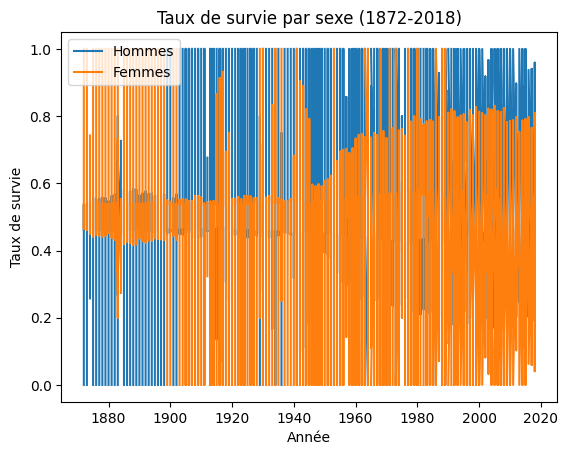

In [6]:
import matplotlib.pyplot as plt

# Tracer les taux de survie pour les hommes
plt.plot(data['Year'], data['Survival Rate Male'], label='Hommes')

# Tracer les taux de survie pour les femmes
plt.plot(data['Year'], data['Survival Rate Female'], label='Femmes')

# Ajouter des labels et une légende
plt.xlabel('Année')
plt.ylabel('Taux de survie')
plt.title('Taux de survie par sexe (1872-2018)')
plt.legend()

# Afficher la tracé
plt.show()


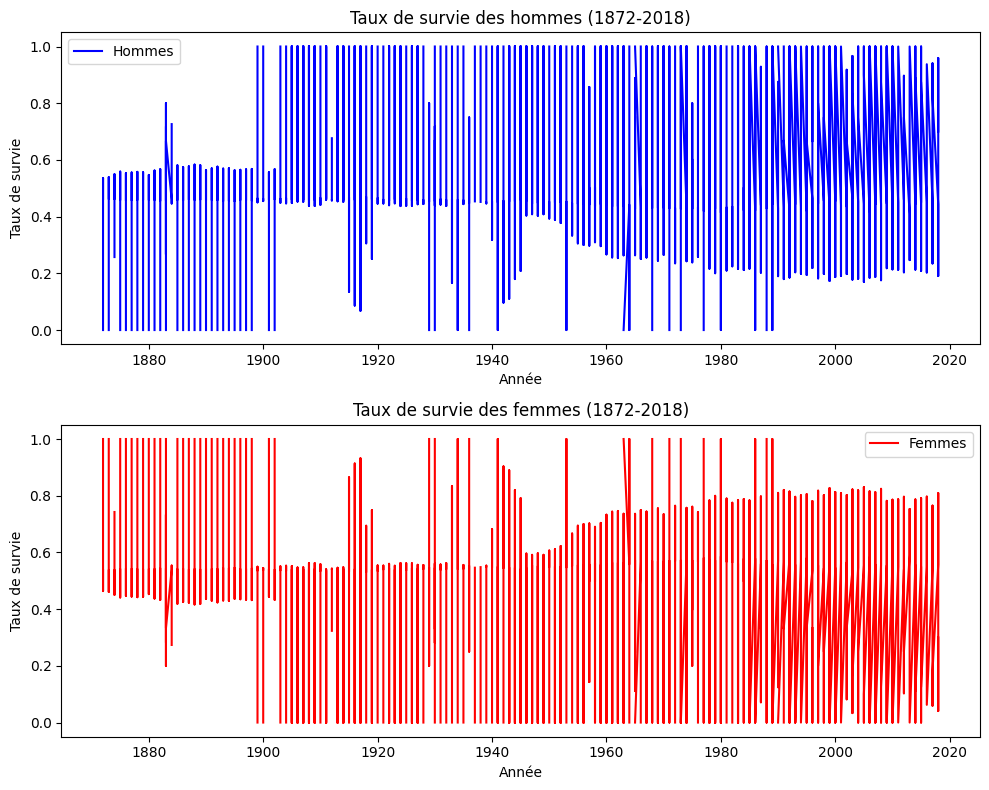

In [7]:
#Question2
import matplotlib.pyplot as plt

# Créer une figure et des axes pour les taux de survie des hommes
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Tracer le taux de survie pour les hommes
ax[0].plot(data['Year'], data['Survival Rate Male'], label='Hommes', color='blue')
ax[0].set_xlabel('Année')
ax[0].set_ylabel('Taux de survie')
ax[0].set_title('Taux de survie des hommes (1872-2018)')
ax[0].legend()

# Tracer le taux de survie pour les femmes
ax[1].plot(data['Year'], data['Survival Rate Female'], label='Femmes', color='red')
ax[1].set_xlabel('Année')
ax[1].set_ylabel('Taux de survie')
ax[1].set_title('Taux de survie des femmes (1872-2018)')
ax[1].legend()

# Afficher les tracés
plt.tight_layout()
plt.show()


In [8]:
# Calculer le taux de mortalité masculin
data['Mortality Rate Male'] = data['Male'] / data['Male'].sum()

# Afficher les premières lignes du DataFrame avec la nouvelle colonne
print(data.head())

   Year Age     Female       Male      Total  Survival Rate Male  \
0  1872   0  105389.10  122499.48  227888.58            0.462459   
1  1872   1   37541.38   38997.43   76538.81            0.490488   
2  1872   2   25317.44   26313.24   51630.68            0.490357   
3  1872   3   16238.95   16867.39   33106.34            0.490509   
4  1872   4   10305.89   10659.91   20965.80            0.491557   

   Survival Rate Female  Mortality Rate Male  
0              0.537541             0.002537  
1              0.509512             0.000808  
2              0.509643             0.000545  
3              0.509491             0.000349  
4              0.508443             0.000221  


In [9]:
# Calculer le taux de mortalité masculin
data['Mortality Rate Female'] = data['Female'] / data['Female'].sum()

# Afficher les premières lignes du DataFrame avec la nouvelle colonne
print(data.head())

   Year Age     Female       Male      Total  Survival Rate Male  \
0  1872   0  105389.10  122499.48  227888.58            0.462459   
1  1872   1   37541.38   38997.43   76538.81            0.490488   
2  1872   2   25317.44   26313.24   51630.68            0.490357   
3  1872   3   16238.95   16867.39   33106.34            0.490509   
4  1872   4   10305.89   10659.91   20965.80            0.491557   

   Survival Rate Female  Mortality Rate Male  Mortality Rate Female  
0              0.537541             0.002537               0.002333  
1              0.509512             0.000808               0.000831  
2              0.509643             0.000545               0.000560  
3              0.509491             0.000349               0.000359  
4              0.508443             0.000221               0.000228  


In [10]:
#Question3
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Créer le modèle Holt-Winters
model_male = ExponentialSmoothing(data['Mortality Rate Male'], seasonal_periods=12)
model_female = ExponentialSmoothing(data['Mortality Rate Female'], seasonal_periods=12)

# Ajuster le modèle aux données
fitted_model_male = model_male.fit()
fitted_model_female = model_female.fit()

# Estimer la projection centrale sur 20 ans pour les hommes
forecast_male = fitted_model_male.forecast(steps=20)

# Estimer la projection centrale sur 20 ans pour les femmes
forecast_female = fitted_model_female.forecast(steps=20)

# Afficher les prévisions
print("Projection centrale sur 20 ans des taux de mortalité pour les hommes :\n", forecast_male)
print("\nProjection centrale sur 20 ans des taux de mortalité pour les femmes :\n", forecast_female)


Projection centrale sur 20 ans des taux de mortalité pour les hommes :
 16317    0.000002
16318    0.000002
16319    0.000002
16320    0.000002
16321    0.000002
16322    0.000002
16323    0.000002
16324    0.000002
16325    0.000002
16326    0.000002
16327    0.000002
16328    0.000002
16329    0.000002
16330    0.000002
16331    0.000002
16332    0.000002
16333    0.000002
16334    0.000002
16335    0.000002
16336    0.000002
dtype: float64

Projection centrale sur 20 ans des taux de mortalité pour les femmes :
 16317    0.000003
16318    0.000003
16319    0.000003
16320    0.000003
16321    0.000003
16322    0.000003
16323    0.000003
16324    0.000003
16325    0.000003
16326    0.000003
16327    0.000003
16328    0.000003
16329    0.000003
16330    0.000003
16331    0.000003
16332    0.000003
16333    0.000003
16334    0.000003
16335    0.000003
16336    0.000003
dtype: float64


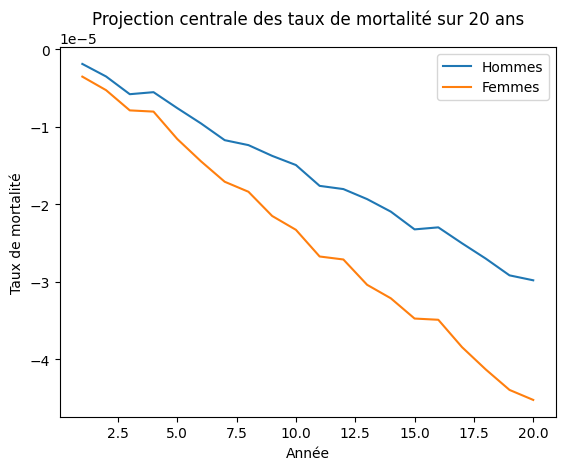

In [11]:
#Question3
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Supposons que vous avez déjà calculé les taux de mortalité masculin et féminin dans les variables suivantes : 
# mortalite_hommes et mortalite_femmes

# Créer le modèle de lissage exponentiel pour les taux de mortalité masculin
model_hommes = ExponentialSmoothing(data['Mortality Rate Male'], trend='add', seasonal='add', seasonal_periods=12)
fitted_model_hommes = model_hommes.fit()

# Créer le modèle de lissage exponentiel pour les taux de mortalité féminin
model_femmes = ExponentialSmoothing(data['Mortality Rate Female'], trend='add', seasonal='add', seasonal_periods=12)
fitted_model_femmes = model_femmes.fit()

# Estimer la projection centrale sur 20 ans pour les taux de mortalité masculin
forecast_hommes = fitted_model_hommes.forecast(steps=20)

# Estimer la projection centrale sur 20 ans pour les taux de mortalité féminin
forecast_femmes = fitted_model_femmes.forecast(steps=20)

# Tracer les projections centrales pour les taux de mortalité masculin et féminin
plt.plot(range(1, 21), forecast_hommes, label='Hommes')
plt.plot(range(1, 21), forecast_femmes, label='Femmes')
plt.xlabel('Année')
plt.ylabel('Taux de mortalité')
plt.title('Projection centrale des taux de mortalité sur 20 ans')
plt.legend()
plt.show()


In [12]:
#Question4
# Convertir les colonnes "Age", "Female" et "Male" en numériques si elles ne le sont pas déjà
data["Age"] = pd.to_numeric(data["Age"], errors="coerce")
data["Female"] = pd.to_numeric(data["Female"], errors="coerce")
data["Male"] = pd.to_numeric(data["Male"], errors="coerce")

# Calculer l'espérance de vie moyenne pour les femmes
life_expectancy_female = (data["Age"] * data["Female"]).sum() / data["Female"].sum()

# Calculer l'espérance de vie moyenne pour les hommes
life_expectancy_male = (data["Age"] * data["Male"]).sum() / data["Male"].sum()

print("Espérance de vie moyenne pour les femmes :", life_expectancy_female)
print("Espérance de vie moyenne pour les hommes :", life_expectancy_male)






Espérance de vie moyenne pour les femmes : 50.81517437973418
Espérance de vie moyenne pour les hommes : 47.278419087746926


In [13]:
#Question5
def valeur_actuelle_probable(data, taux_technique):
    # Age de début du contrat
    age_debut_contrat = 62

    # Durée de la rente en années
    duree_rentre = 20

    # Taux de mortalité
    taux_mortalite = data["Mortality Rate Female"]

    # Calculer la probabilité de survie jusqu'à chaque âge pour chaque individu
    probabilite_survie = (1 - taux_mortalite) ** (age_debut_contrat + duree_rentre - data["Age"])

    # Calculer la probabilité de décès à chaque âge pour chaque individu
    probabilite_deces = 1 - probabilite_survie

    # Calculer la valeur actuelle probable de chaque rente mensuelle pour chaque individu
    valeur_actuelle_rentes = (1 - (1 + taux_technique) ** -12) / taux_technique * probabilite_deces

    # Somme des valeurs actuelles probables de toutes les rentes pour tous les individus
    valeur_actuelle_totale = valeur_actuelle_rentes.sum()

    return valeur_actuelle_totale

# Exemple d'utilisation
taux_technique = 0.005  # Taux technique de 0.5%
valeur_actuelle = valeur_actuelle_probable(data, taux_technique)
print("La valeur actuelle probable du contrat est de :", valeur_actuelle, "euros")



La valeur actuelle probable du contrat est de : 352.23865119841304 euros


In [14]:
#Question5
def valeur_actuelle_probable(data, taux_technique):
    # Age de début du contrat
    age_debut_contrat = 62

    # Durée de la rente en années
    duree_rentre = 20

    # Taux de mortalité
    taux_mortalite = data["Mortality Rate Male"]

    # Calculer la probabilité de survie jusqu'à chaque âge pour chaque individu
    probabilite_survie = (1 - taux_mortalite) ** (age_debut_contrat + duree_rentre - data["Age"])

    # Calculer la probabilité de décès à chaque âge pour chaque individu
    probabilite_deces = 1 - probabilite_survie

    # Calculer la valeur actuelle probable de chaque rente mensuelle pour chaque individu
    valeur_actuelle_rentes = (1 - (1 + taux_technique) ** -12) / taux_technique * probabilite_deces

    # Somme des valeurs actuelles probables de toutes les rentes pour tous les individus
    valeur_actuelle_totale = valeur_actuelle_rentes.sum()

    return valeur_actuelle_totale

# Exemple d'utilisation
taux_technique = 0.005  # Taux technique de 0.5%
valeur_actuelle = valeur_actuelle_probable(data, taux_technique)
print("La valeur actuelle probable du contrat est de :", valeur_actuelle, "euros")

La valeur actuelle probable du contrat est de : 391.6845262894011 euros


In [15]:
#Question 6
# Remplacer les valeurs manquantes par zéro
data.fillna(0, inplace=True)

# Calculer la VAP pour les hommes
vap_hommes = sum(data['Male'] * 12 / (1 + 0.005) ** (data['Age'] - 62))

# Calculer la VAP pour les femmes
vap_femmes = sum(data['Female'] * 12 / (1 + 0.005) ** (data['Age'] - 62))

# Calculer la VAP totale
vap_totale = vap_hommes + vap_femmes

print("VAP pour les hommes :", vap_hommes)
print("VAP pour les femmes :", vap_femmes)
print("VAP totale :", vap_totale)



VAP pour les hommes : 631939382.9140155
VAP pour les femmes : 581626151.8453969
VAP totale : 1213565534.7594123


In [16]:
#Question 7
# Calculer la VAP sans différenciation selon le sexe
vap_sans_difference = sum((data['Male'] + data['Female']) * 12 / (1 + 0.005) ** (data['Age'] - 62))

print("VAP sans différenciation  :", vap_sans_difference)


VAP sans différenciation  : 1213565534.7594125


In [17]:
#Question8
# Calculer la prime pure en ne prenant en compte que les données de la population globale
prime_pure_globale = sum(data['Total'] * 12 / (1 + 0.005) ** (data['Age'] - 62))

print("Valeur de la prime pure du produit pour la population globale :", prime_pure_globale)


Valeur de la prime pure du produit pour la population globale : 1213565534.7594125
